# <span style="color:purple"> **Tarea Examen 3 Física Computacional**</span>
#### Dehesa Corona Valeria Carolina
*Elaborado en Jupyter Notebook*

#### Bibliotecas adicionales:

In [1]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas
import seaborn as sns #Requirió instalar mediante pip3 install seaborn==0.11.0 en mi anaconda prompt
from numpy import linalg as LA
import math

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

**$1$. Encuentra la solución numérica para la ecuación diferencial $∇^2φ = 0$ en dos dimensiones con condiciones
a la frontera $φ(0, y) = φ(x, 0) = φ(1, y) = φ(x, 1)$ = 0 y $φ = 1$ para todos los puntos $x$, y en dos círculos
de radio $1/4$ con centros en $(0.4, 0.5)$ y $(0.6, 0.5)$. (3 puntos).**

**Dibuje las líneas de campo vectorial que se generan de obtener $−∇φ$. (1 pto. extra)**

Primero, generamos una malla. Nos interesa que la malla tenga ciertas condiciones; que la longitud de cada lado es de una unidad, que tenga 0´s asignados a los puntos en las orillas (como indican las condiciones iniciales), que tenga asignados 1´s en los puntos dentro de los círculos que generaremos(de radio $\frac{1}{4}$ y centros en $(0.4, 0.5)$ y $(0.6, 0.5)$) y finalmente que tenga asignadas variables aleatorias en todos aquellos puntos que no son orilla o que no caen dentro de un círculo.

In [2]:
def malla(len_x, len_y): #Longitudes de x y y
    malla = np.zeros((len_x, len_y)) #Inicializamos matriz tamaño (longitud de x, longitud de y) de puntos donde asignaremos 
    #los valores 0,1 y random
    
    # Especificamos los parámetros de radio y centro de los círculos
    radio = int(0.25 * len_x) #Radio 1/4
    
    # Especificamos los centros
    centro_1_x, centro_1_y = int(0.4 * len_x), int(0.5 * len_y) # Para el centro en (0.4, 0.5), dado que lada lado de la matriz
    #representa una unidad
    centro_2_x, centro_2_y = int(0.6 * len_x), int(0.5 * len_y) # Para el centro en (0.6, 0.5)
    
    # Creamos un array de índices para la malla
    I_1, J_1 = np.meshgrid(np.arange(malla.shape[0]),np.arange(malla.shape[1]))
    I_2, J_2 = np.meshgrid(np.arange(malla.shape[0]),np.arange(malla.shape[1]))
    
    # Establecemos variables que guarden la distancia a los dos centros
    dist_circulo_1 = np.sqrt((I_1 - centro_1_x)**2+(J_1 - centro_1_y)**2)
    dist_circulo_2 = np.sqrt((I_2 - centro_2_x)**2+(J_2 - centro_2_y)**2)
    
    # asignamos 1 en los puntos que caigan dentro de los círculos
    malla[np.where(dist_circulo_1 < radio)] = 1
    malla[np.where(dist_circulo_2 < radio)] = 1
    
    # Asignamos a todos los puntos que no caigan en los círculos números aleatorios
    for renglon in range(len_x):
        for columna in range(len_y):
            if malla[renglon, columna] != 1:
                malla[renglon, columna] = random.random()
                
    # Sustituimos por 0 los puntos que esten en la orilla como indica la condicion de frontera
    for renglon in range(malla.shape[0]):
            for columna in range(malla.shape[1]):
                malla[0,columna] = 0
                malla[malla.shape[0] - 1, columna] = 0
                malla[renglon, 0] = 0
                malla[renglon, malla.shape[1] - 1] = 0

                
    
    return malla

Revisamos la malla con un número lo suficientemente pequeño de puntos para visualizarla claramente

In [3]:
print(malla(6,6))

[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.1590833  0.62333155 0.14789566 0.33302486 0.        ]
 [0.         0.11416667 0.24008024 0.85296517 0.54260289 0.        ]
 [0.         0.44999822 1.         1.         0.39891539 0.        ]
 [0.         0.24047153 0.41142997 0.0127583  0.6068179  0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


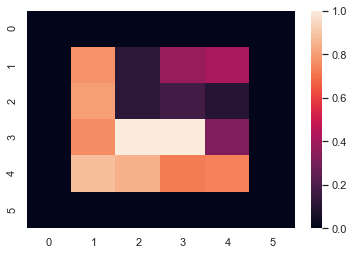

In [4]:
sns.set_theme()
chafa_data = malla(6,6)
ax = sns.heatmap(chafa_data)

Estableceremos dos ejemplos para diferenciar la nitidez, esto refleja la importancia de un gran número de puntos para una mejor visualización. Notemos que ambas mallas cumplen con nuestras condiciones preestablecidas.

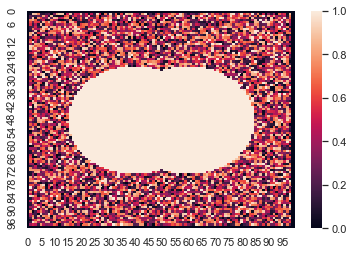

In [5]:
sns.set_theme()
len_y,len_x = 100,100
hd_data = malla(len_x,len_y)
ax = sns.heatmap(hd_data)

In [6]:
# Pasando la función relax del notebook de clase a python
def relax(malla, V_0 = 1):
    for i in range(1, len_y - 1):
        for j in range(1, len_x - 1):
            if malla[i,j] != V_0:
                malla[i,j] = 0.25* ( malla[i+1,j] + malla[i-1,j] + malla[i,j+1] + malla[i,j-1] ) 
    return malla

# Pasando la funcion método relac del notebook de clase a python
def metodo_relax(malla, error = 1e-5):
    convergencia = False
    ciclos = 0
    while convergencia == False:
        ciclos += 1
        for i in range(1, 40):
            malla = relax(malla)
        malla_vieja = np.copy(malla)
        malla = relax(malla)
        if np.amax( abs( malla - malla_vieja) ) <= error :
            convergencia = True
    return malla, ciclos

Pasamos la malla "hd" generada por el método relax

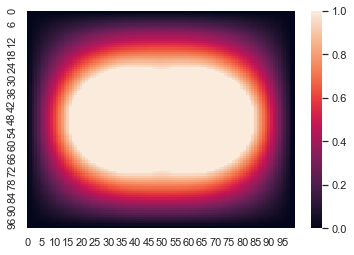

In [7]:
sns.set_theme()
uniform_data, num = metodo_relax(hd_data)
ax = sns.heatmap(uniform_data)


**$2$. Encuentre la solución a la ecuación de Fourier en 2D con condición a la frontera $φ(0, y) = φ(x, 0) =
φ(1, y) = φ(x, 1) = 0$ y con condición inicial $φ(x, y, 0) = 0$ para todos los puntos afuera de los dos
círculos de radio $1/4$ con centros en $(0.4, 0.5)$ y $(0.6, 0.5)$, y $φ = 1$ para todos los puntos dentro de los
dos círculos anteriores. (3 puntos) Puede suponer que el coeficiente de difusión es 1.**

Resolveremos la ecuación matricial de evolución temporal primero programando las matrices A y B. Necesitamos generar otra malla, ésta deberá cumplir con las siguientes características;  una vez más el la distancia de extremo a extremo de la malla es de una unidad, de nuevo asignaremos 1´s a los puntos que se encuentren  dentro de los dos círculos de radio $1/4$ y centros en  $(0.4, 0.5)$ y $(0.6, 0.5)$, pero ahora asignaremos 0´s a todos los puntos restantes.

In [9]:
def malla_2(len_x, len_y): #Longitudes de x y y
    malla = np.zeros((len_x, len_y))

    radio = int(0.25 * len_x) #Establecemos radio 1/4
    centro_1_x, centro_1_y = int(0.4 * len_x), int(0.5 * len_y) # (0.4, 0.5) centros
    centro_2_x, centro_2_y = int(0.6 * len_x), int(0.5 * len_y) # (0.6, 0.5)
    
    I_1, J_1 = np.meshgrid(np.arange(malla.shape[0]),np.arange(malla.shape[1]))# Arreglo de índices para la malla
    I_2, J_2 = np.meshgrid(np.arange(malla.shape[0]),np.arange(malla.shape[1]))
    
    dist_circulo_1 = np.sqrt((I_1 - centro_1_x)**2+(J_1 - centro_1_y)**2)#Establecemos disntancias a los dos centros  
    dist_circulo_2 = np.sqrt((I_2 - centro_2_x)**2+(J_2 - centro_2_y)**2)#para después condicionar la asignación de puntos
    
    malla[np.where(dist_circulo_1 < radio)] = 1 #Comezamos la asignación con 1´s dentro de los radios de los circulos
    malla[np.where(dist_circulo_2 < radio)] = 1
                
    return malla

# Traducimos a python la función del notebook de clase
def evolucion(x, y, t, D = 1.0): #Si no se indica de otro modo, el coeficiente de difusión será 1
    len_x, len_y = len(x), len(y) #Longitudes de x y y
    dx, dy, dt = x[1]-x[0], y[1]-y[0], t[1]-t[0]
    r = (D * dt) / (2 * dx * dy)
    print(" Para la matriz  de evolución: r = ", r)
    A = np.zeros([(len_x-2)*(len_y-2), (len_x-2)*(len_y-2)])
    B = np.zeros([(len_x-2)*(len_y-2), (len_x-2)*(len_y-2)])
    
    for i in range(len_x-2):
        for j in range(len_y-2):
            A[ (len_y-2)*(i-1)+j, (len_y-2)*(i-1)+j ] = 1 + 4 * r
            B[ (len_y-2)*(i-1)+j, (len_y-2)*(i-1)+j ] = 1 - 4 * r
            
    for i in range(len_x-2):
        for j in range(len_y-3):
            A[ (len_y-2)*(i-1)+j, (len_y-2)*(i-1)+j+1 ] = -r
            A[ (len_y-2)*(i-1)+j+1, (len_y-2)*(i-1)+j ] = -r
            B[ (len_y-2)*(i-1)+j, (len_y-2)*(i-1)+j+1 ] = r
            B[ (len_y-2)*(i-1)+j+1, (len_y-2)*(i-1)+j ] = r
            
    for i in range(1, len_x-3 + 1):
        for j in range(len_y-2):
            A[ (len_y-2)*(i-1)+j, (len_y-2)*(i)+j ] = -r
            A[ (len_y-2)*(i)+j, (len_y-2)*(i-1)+j ] = -r
            B[ (len_y-2)*(i-1)+j, (len_y-2)*(i)+j ] = r
            B[ (len_y-2)*(i)+j, (len_y-2)*(i-1)+j ] = r
    
    A_inv = np.linalg.inv(A) #Utilizamos la librería de numpy con linalg para invertir la matriz y multiplicar por B
    evol = np.matmul(A_inv, B)
    
    return evol

Revisamos que la malla cumpla las condiciones con un ejemplo que permita visualizarla completa

In [10]:
phi_ini_mini = malla_2(15,15)
phi_ini_mini

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

Visualizamos con ayuda de un heatmap una malla de mayor tamaño

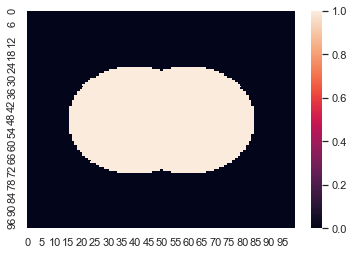

In [11]:
phi_ini = malla_2(100,100)
ax = sns.heatmap(phi_ini)

Revisamos nuestra matriz de evolución (debería coincidir con el número de puntos interiores de phi_ini)

In [12]:
x = np.linspace(0,1.0,100)
y = np.linspace(0,1.0,100)
t = np.linspace(0,1.0,10000)
m_evo = evolucion(x,y,t)
print(m_evo.shape)

 Para la matriz  de evolución: r =  0.49009900990099003
(9604, 9604)


In [13]:
#Traducimos a python Crank-Nicholson de la clase
def Crank(phi_ini, m_evo, t):
    Nx, Ny, len_t = int(phi_ini.shape[0]), int(phi_ini.shape[1]), len(t)
    phi_xy_t = np.zeros([Nx, Ny, len_t])
    phi_xy_t[:,:,0] = phi_ini
    phi_in_t = np.reshape(phi_ini[1:-1,1:-1], (-1,1) )
    for i in range(1, len_t):
        phi_in_t = np.matmul(m_evo, phi_in_t)
        phi_xy_t[1:-1,1:-1,i] = np.reshape(phi_in_t, (Nx-2, -1) )
    
    return phi_xy_t

Nuestro sistema con su cambio temporal:

In [14]:
phi_total = Crank(phi_ini, m_evo, t)

Revisamos que nuestra malla cumpla con las condiciones iniciales. Claramente el tiempo 0 coincide con la condicion inicial planteada

In [15]:
@interact_manual(times = (0, 9999))
def digievolucion(times):
    sns.heatmap(phi_total[:,:,times])

interactive(children=(IntSlider(value=4999, description='times', max=9999), Button(description='Run Interact',…

**$3$. Encuentre los estados estacionarios de la ecuación de onda en 2D para una membrana rectangular
$Lx = π$, $Ly = 2π$. Compare la solución numérica de los eigenvalores con la solución analítica. (3
puntos)**
**¿Qué sucede con la solución si ahora $Lx = π$, $Ly =√2π$ ? (1 punto).**

Primero buscaremos la solución analítica al problema dado:

Uno puede encontrar las soluciones a partir de la ecuación de onda en 2D:
$$ 
\frac{{\partial^2} u}{\partial t^2}= a^2\nabla^2 u
$$
Donde $u=u(x,y,t)$ e imponemos las condiciones de frontera:
$$ 
 0 \leq x \leq b  \wedge 0 \leq y \leq c
$$ 
De igual manera imponemos que la frontera de la membrana se quede fija con:
$$
u(0,y,t)=u(b,y,t)=0 \wedge u(x,0,t)=u(x,c,t)=0
$$
Y la membrana se ve perturbada por una desviación y velocidad iniciales:
$$
u(x,y,0)=\Phi(x,y) \wedge \frac{\partial u}{\partial t}_{t=0}=\Psi(x,y)
$$

Así, podemos resolver por el método de Variables separables, proponemos:
$$
u(x,y,t)=X(x)Y(y)T(t)
$$
De donde se obtiene de inmediato las siguientes ecuaciones:
$$
T^{\prime\prime} + a^2\lambda T=0
$$
$$
X^{\prime\prime} + \nu X=0 \wedge Y^{\prime\prime} + \mu Y=0
$$
Donde las constantes de separación están ligadas a partir de $\mu+\nu=\lambda$

Es fácil ver que las ecuaciones espaciales, $X$ y $Y$ son ecuaciones de onda usuales y tienen soluciones de la siguiente forma:
$$
X_n(x)=sen\left(\frac{n\pi x}{b}\right)  \wedge  Y_m(y)= sen\left(\frac{m\pi y}{c}\right)
$$
con sus respectivas constantes de separación:
$$
\nu_n=\left(\frac{n\pi }{b}\right)^2 \wedge \mu_n=\left(\frac{m\pi }{b}\right)^2
$$
Por lo tanto, los eigenvalores de $\lambda$ están dados por:
$$
\lambda_{n,m}= \nu_n=\left(\frac{n\pi }{b}\right)^2 + \mu_n=\left(\frac{m\pi }{b}\right)^2
$$
Y corresponden a las eigenfunciones $v(x,y)=X(x)Y(y)$:
$$
v_{n,m}=sen\left(\frac{n\pi x}{b}\right)sen\left(\frac{m\pi y}{c}\right)
$$

Ya con éstas eigenfunciones, podemos encontrar la forma general de las eigenfunciones de $T(t)$:
$$
T(t)= Acos(\omega t) + Bsen(\omega t)
$$
Donde $\omega$ satisface la siguiente de relación de dispersión:
$$
\omega^2=\omega_{n,m}^2=a^2(\mu^2+\nu^2)\pi^2
$$

Así, la solución general para el desplazamiento es la multiplicación de las 3 soluciones:
$$
u(x,y,t)=\sum_{m=1}^{\infty}\sum_{n=1}^{\infty}sen\left(\frac{n\pi x}{b}\right)sen\left(\frac{m\pi y}{c}\right)\left[A_{n,m}cos(\omega_{n,m} t) + B_{n,m}sen(\omega_{n,m} t) \right]
$$

In [16]:
def Mat_onda_2D(x,y):
    Nx,Ny = len(x),len(y)
    A = np.zeros([Ny*Nx,Ny*Nx])
    for i in range(Nx):
        for j in range(1,Ny+1):
            A[Ny*(i-1)+j,Ny*(i-1)+j] = -4
    
    for i in range(1,Nx+1):
        for j in range(1,Ny-1):
            A[Ny*(i-1)+j,Ny*(i-1)+j+1] = 1
            A[Ny*(i-1)+j+1,Ny*(i-1)+j] = 1
        
    
    for i in range(1,Nx):
        for j in range(Ny):
            A[Ny*(i-1)+j,Ny*i+j] = 1
            A[Ny*i+j,Ny*(i-1)+j] = 1
        
    return A

In [18]:
x = np.arange(0,np.pi,0.1)
y = np.arange(0,2*(np.pi),0.1)
M = Mat_onda_2D(x[1:-1],y[1:-1])
M #Revisamos la matriz

array([[-4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., -4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -4.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -4.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -4.]])

In [19]:
vals = LA.eig(M) #Utilizamos la librería de numpy
h = x[1]-x[0] # hx=hy=h

m = vals[0] #Tomamos solo el primer arreglo porque no nos interesa el arreglo de los unitarios

In [20]:
g = np.sqrt(-m)/h 
g

array([24.47394257, 24.41118572, 24.30695068, ..., 19.86507206,
       19.86024682, 19.86030413])

In [21]:
b = np.sqrt(2*(np.pi))
x2 = np.arange(0,np.pi,0.1)
y2 = np.arange(0,b,0.1)
M2 = Mat_onda_2D(x[1:-1],y[1:-1])
M2 #Revisamos la matriz

array([[-4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., -4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -4.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -4.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -4.]])

In [22]:
vals2 = LA.eig(M) #Utilizamos la librería de numpy
h2 = x2[1]-x2[0] # hx=hy=h

m2 = vals2[0] #Tomamos solo el primer arreglo porque no nos interesa el arreglo de los unitarios

In [23]:
g2 = np.sqrt(-m2)/h2
g2

array([24.47394257, 24.41118572, 24.30695068, ..., 19.86507206,
       19.86024682, 19.86030413])